In [3]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


In [6]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path


'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

In [7]:
# Open and read in the digital terrain model
# Note that rio is the alias for rasterio
with rio.open(lidar_dtm_path) as src:
    lidar_dtm = src.read(1, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm


masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [10]:
## Exploe Raste data values and structure
type(lidar_dtm)


numpy.ma.core.MaskedArray

In [11]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())


1676.21 2087.43


In [12]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape


(2000, 4000)

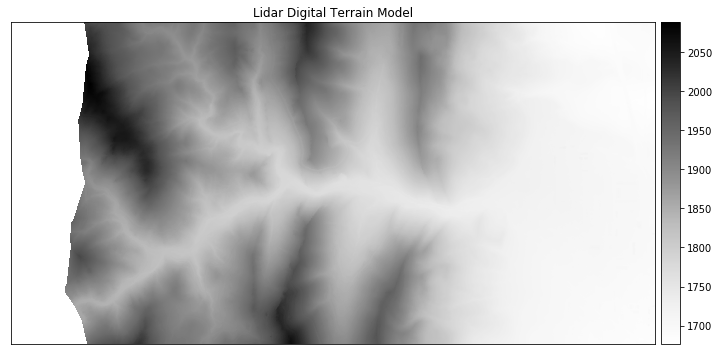

In [13]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()


# Imagery - Another type of raster data

In [14]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")


Extracted output to /Users/Jroldan001/earth-analytics/data/earthpy-downloads/naip-before-after


'/Users/Jroldan001/earth-analytics/data/earthpy-downloads/naip-before-after'

In [15]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path


'earthpy-downloads/naip-before-after/pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

In [16]:
# Open the data using rasterio
with rio.open(naip_pre_fire_path) as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()

naip_pre_fire


array([[[113, 117, 137, ...,  54,  51,  74],
        [113, 117, 131, ...,  63,  54,  54],
        [111, 117, 120, ...,  78,  76,  52],
        ...,
        [191, 192, 193, ...,  58,  69,  76],
        [192, 192, 193, ...,  53,  62,  71],
        [193, 193, 193, ...,  51,  59,  66]],

       [[114, 114, 126, ...,  58,  54,  72],
        [114, 112, 120, ...,  70,  60,  58],
        [111, 114, 115, ...,  85,  87,  58],
        ...,
        [183, 184, 185, ...,  61,  75,  84],
        [184, 185, 185, ...,  56,  66,  78],
        [186, 186, 186, ...,  52,  58,  65]],

       [[ 80,  87,  95, ...,  55,  54,  63],
        [ 79,  83,  90, ...,  57,  55,  55],
        [ 81,  84,  87, ...,  62,  65,  55],
        ...,
        [161, 161, 163, ...,  54,  58,  64],
        [162, 164, 165, ...,  53,  58,  62],
        [165, 166, 166, ...,  51,  54,  57]],

       [[145, 143, 139, ...,  74,  47,  65],
        [145, 146, 139, ...,  98,  59,  57],
        [142, 144, 144, ..., 119, 107,  54],
        ..

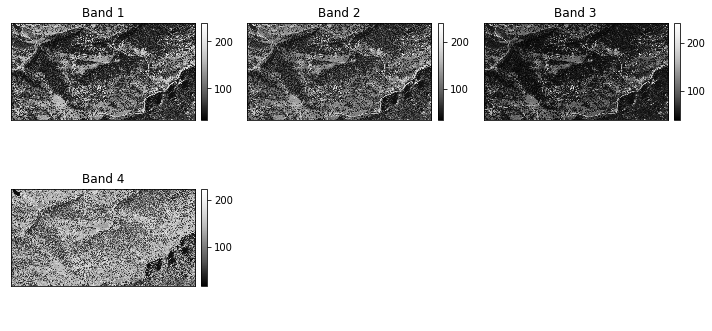

In [17]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()


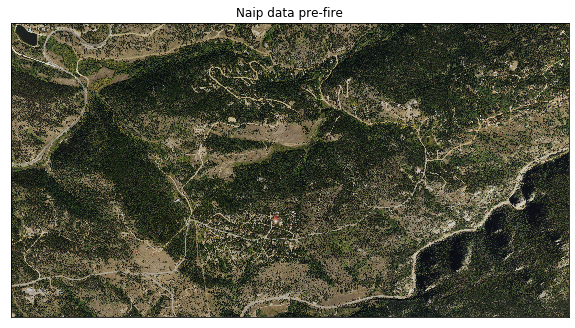

In [19]:
# Plot color image
ep.plot_rgb(naip_pre_fire,
            title="Naip data pre-fire")
plt.show()
